<a href="https://colab.research.google.com/github/sameeraghban/Machine_Learning_Projects/blob/main/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing required libraries

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

#  Download and explore the dataset

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = 'sameer535986'
os.environ['KAGGLE_KEY'] = 'ec979a879ac3a8171a920da3474af132'

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

100% 207M/207M [00:02<00:00, 101MB/s]



In [ ]:
! unzip covid-face-mask-detection-dataset.zip

Archive:  covid-face-mask-detection-dataset.zip
  inflating: New Masks Dataset/Test/Mask/2070.jpg  
  inflating: New Masks Dataset/Test/Mask/2072.jpg  
  inflating: New Masks Dataset/Test/Mask/2083.jpg  
  inflating: New Masks Dataset/Test/Mask/2085.jpg  
  inflating: New Masks Dataset/Test/Mask/2086.jpg  
  inflating: New Masks Dataset/Test/Mask/2110.jpg  
  inflating: New Masks Dataset/Test/Mask/2113.jpg  
  inflating: New Masks Dataset/Test/Mask/2114.jpeg  
  inflating: New Masks Dataset/Test/Mask/2130.jpg  
  inflating: New Masks Dataset/Test/Mask/2132.jpg  
  inflating: New Masks Dataset/Test/Mask/2135.jpg  
  inflating: New Masks Dataset/Test/Mask/2154.png  
  inflating: New Masks Dataset/Test/Mask/2158.png  
  inflating: New Masks Dataset/Test/Mask/2159.png  
  inflating: New Masks Dataset/Test/Mask/2160.png  
  inflating: New Masks Dataset/Test/Mask/2170.png  
  inflating: New Masks Dataset/Test/Mask/2172.png  
  inflating: New Masks Dataset/Test/Mask/2173.png  
  inflating: Ne

In [ ]:
main_dir = '/content/New Masks Dataset'
train_dir = os.path.join(main_dir,'Train')
test_dir = os.path.join(main_dir,'Test')
valid_dir = os.path.join(main_dir,'Validation')

train_mask_dir =  os.path.join(train_dir,'Mask')
train_nomask_dir =  os.path.join(train_dir,'Non Mask')

In [ ]:
train_mask_names = os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names = os.listdir(train_nomask_dir)
print(train_nomask_names[:10])

['0934.png', '1095.jpg', '1159.jpg', '1637.jpg', '0277.jpg', '0243.jpg', '0197.png', '0417.jpg', '0498.jpg', '0638.jpg']
['39.jpg', '42.jpg', '36.jpg', '158.jpg', '253.jpg', '334.jpg', '263.jpg', '59.jpg', '53.jpg', '232.jpg']


# Image Visualization

['/content/New Masks Dataset/Train/Mask/0934.png', '/content/New Masks Dataset/Train/Mask/1095.jpg', '/content/New Masks Dataset/Train/Mask/1159.jpg', '/content/New Masks Dataset/Train/Mask/1637.jpg', '/content/New Masks Dataset/Train/Mask/0277.jpg', '/content/New Masks Dataset/Train/Mask/0243.jpg', '/content/New Masks Dataset/Train/Mask/0197.png', '/content/New Masks Dataset/Train/Mask/0417.jpg']
['/content/New Masks Dataset/Train/Non Mask/39.jpg', '/content/New Masks Dataset/Train/Non Mask/42.jpg', '/content/New Masks Dataset/Train/Non Mask/36.jpg', '/content/New Masks Dataset/Train/Non Mask/158.jpg', '/content/New Masks Dataset/Train/Non Mask/253.jpg', '/content/New Masks Dataset/Train/Non Mask/334.jpg', '/content/New Masks Dataset/Train/Non Mask/263.jpg', '/content/New Masks Dataset/Train/Non Mask/59.jpg']


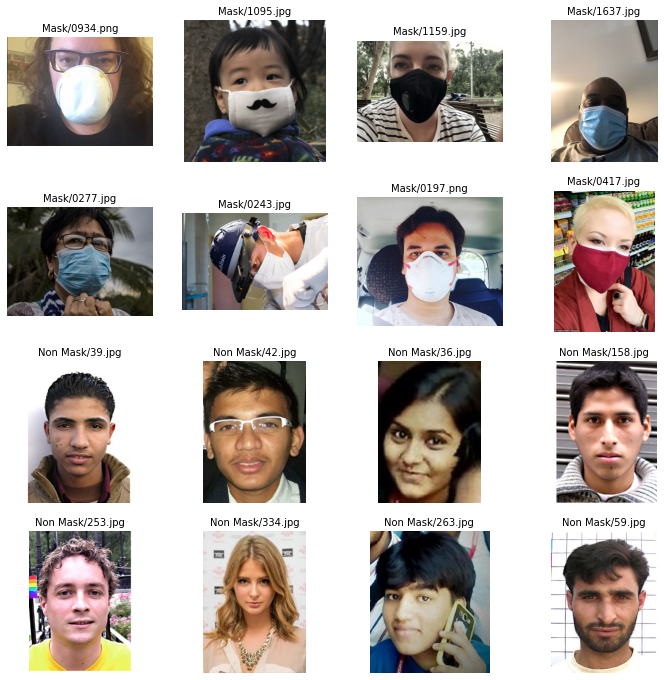

In [ ]:
import matplotlib.image as mpimg
nrows = 4
ncols = 4
plt.figure(figsize=(12,12))

mask_pic = []
for i in train_mask_names[:8]:
    mask_pic.append(os.path.join(train_mask_dir,i))

nomask_pic = []
for i in train_nomask_names[:8]:
    nomask_pic.append(os.path.join(train_nomask_dir,i))

print(mask_pic)
print(nomask_pic)

merged_list = mask_pic + nomask_pic
# print(merged_list)

for i in range(len(merged_list)):
    data = merged_list[i].split('/',4)[4]
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis('off')
    image = mpimg.imread(merged_list[i])
    sp.set_title(data,fontsize=10)
    plt.imshow(image,cmap='gray')
plt.show()

# Data Augumentation

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255     #normalizing the data
                                   , zoom_range=0.2   #random crops from images
                                   , rotation_range=40, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir  # source directory of train dataset
                                                    , target_size = (150,150)
                                                    , batch_size = 32
                                                    , class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(test_dir  # source directory of test dataset
                                                    , target_size = (150,150)
                                                    , batch_size = 32
                                                    , class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(valid_dir  # source directory of valid dataset
                                                    , target_size = (150,150)
                                                    , batch_size = 32
                                                    , class_mode = 'binary')

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Mask': 0, 'Non Mask': 1}

In [ ]:
train_generator.image_shape

(150, 150, 3)

# CNN model

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3), padding='SAME',activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3), padding='SAME',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
model.compile(Adam(learning_rate=.001), loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30
19/19 [==============================] - 44s 672ms/step - loss: 2.1480 - accuracy: 0.5250 - val_loss: 0.6924 - val_accuracy: 0.5065
Epoch 2/30
19/19 [==============================] - 12s 628ms/step - loss: 0.6687 - accuracy: 0.6567 - val_loss: 0.6878 - val_accuracy: 0.6732
Epoch 3/30
19/19 [==============================] - 12s 621ms/step - loss: 0.5786 - accuracy: 0.7033 - val_loss: 0.6036 - val_accuracy: 0.8889
Epoch 4/30
19/19 [==============================] - 11s 606ms/step - loss: 0.4162 - accuracy: 0.8383 - val_loss: 0.4817 - val_accuracy: 0.8399
Epoch 5/30
19/19 [==============================] - 12s 608ms/step - loss: 0.3539 - accuracy: 0.8700 - val_loss: 0.3408 - val_accuracy: 0.8758
Epoch 6/30
19/19 [==============================] - 12s 633ms/step - loss: 0.2878 - accuracy: 0.9083 - val_loss: 0.3721 - val_accuracy: 0.8595
Epoch 7/30
19/19 [==============================] - 11s 616ms/step - loss: 0.2657 - accuracy: 0.9033 - val_loss: 0.2752 - val_accuracy: 0.8856

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

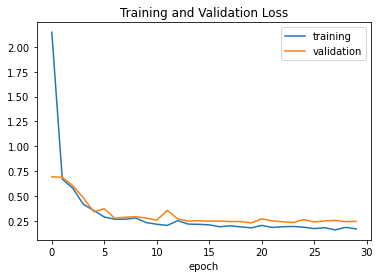

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

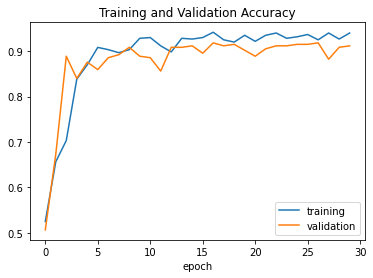

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoch')

# **Test Accuracy**

In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print('Test Loss: {} Test Accuracy: {}'.format(test_loss, test_accuracy))

4/4 [==============================] - 1s 252ms/step - loss: 0.1746 - accuracy: 0.9400
Test Loss: 0.17460401356220245 Test Accuracy: 0.9399999976158142


In [ ]:
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()

for fname in uploaded.keys():
    img_path = '/content/' + fname
    img = image.load_img(img_path, target_size=(150,150))
    images = image.img_to_array(img)
    images = np.expand_dims(images,axis=0)
    prediction = model.predict(images)
    print(fname)
    if prediction==0:
        print('mask')
    else:
        print('nomask')

Saving Mask.jpg to Mask.jpg
Saving No_Mask.jpg to No_Mask.jpg
Mask.jpg
mask
No_Mask.jpg
nomask


In [ ]:
model.save('model.h5')